### Chapter 14: Statistical modeling with statsmodel & patsy

* use case: for a set of response variables (Y), and independent variables (X), find a model that explains the relations between X & Y.

In [198]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg

In [199]:
import patsy

In [200]:
%matplotlib inline
import matplotlib.pyplot as plt

In [201]:
import numpy as np
import pandas as pd

In [202]:
from scipy import stats

In [203]:
import seaborn as sns

### Using patsy

In [204]:
np.random.seed(123456789)

In [205]:
y  = np.array([ 1,  2,  3,  4,  5])
x1 = np.array([ 6,  7,  8,  9, 10])
x2 = np.array([11, 12, 13, 14, 15])

In [206]:
# linear model: Y = b0 + b1x1 + b2x2 + b3x1x2

X = np.vstack([np.ones(5), x1, x2, x1*x2]).T
X

array([[   1.,    6.,   11.,   66.],
       [   1.,    7.,   12.,   84.],
       [   1.,    8.,   13.,  104.],
       [   1.,    9.,   14.,  126.],
       [   1.,   10.,   15.,  150.]])

In [207]:
# use NumPy least-square-fit func to find beta
beta, res, rank, sval = np.linalg.lstsq(X, y)
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

### Patsy syntax
* basic structure: "LHS ~ RHS" (LHS contains response vars; RHS contains independent vars)
* "+" & "-" signs in expressions are set union/difference ops, not math ops
![pic](pics/patsy-syntax.png)

In [208]:
data = {"y": y, "x1": x1, "x2": x2}

In [209]:
# define model
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1*x2", data)

In [210]:
y

DesignMatrix with shape (5, 1)
  y
  1
  2
  3
  4
  5
  Terms:
    'y' (column 0)

In [211]:
X

DesignMatrix with shape (5, 4)
  Intercept  x1  x2  x1:x2
          1   6  11     66
          1   7  12     84
          1   8  13    104
          1   9  14    126
          1  10  15    150
  Terms:
    'Intercept' (column 0)
    'x1' (column 1)
    'x2' (column 2)
    'x1:x2' (column 3)

In [212]:
# DesignMatrix = subclass of NumPy array
type(X)

patsy.design_info.DesignMatrix

In [213]:
np.array(X)

array([[   1.,    6.,   11.,   66.],
       [   1.,    7.,   12.,   84.],
       [   1.,    8.,   13.,  104.],
       [   1.,    9.,   14.,  126.],
       [   1.,   10.,   15.,  150.]])

In [214]:
# can also turn DesignMatrix into Pandas DataFrame
df_data = pd.DataFrame(data)

In [215]:
y, X = patsy.dmatrices("y ~ 1 + x1 + x2 + x1:x2", df_data, return_type="dataframe")
X

,Intercept,x1,x2,x1:x2
0,1.0,6.0,11.0,66.0
1,1.0,7.0,12.0,84.0
2,1.0,8.0,13.0,104.0
3,1.0,9.0,14.0,126.0
4,1.0,10.0,15.0,150.0


In [216]:
# ordinary linear regression (OLS)
model = sm.OLS(y, X)

In [217]:
result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.110223e-15
dtype: float64

In [218]:
model = smf.ols(
    "y ~ 1 + x1 + x2 + x1:x2", 
    df_data)

result = model.fit()
result.params

Intercept   -5.555556e-01
x1           1.888889e+00
x2          -8.888889e-01
x1:x2       -1.110223e-15
dtype: float64

In [219]:
result.summary()

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.401e+26
Date:                Tue, 09 May 2017   Prob (F-statistic):           1.35e-27
Time:                        12:38:39   Log-Likelihood:                 145.84
No. Observations:                   5   AIC:                            -285.7
Df Residuals:                       2   BIC:                            -286.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5556   1.87e-13  -2.96e+12      0.000      -0.556      -0.556
x1             1.8889   6.99e-13    2.7e+12      0.000       1.889       1.889
x2            -0.8889   2.38e-13  -3.73e+12      0.000      -0.889      -0.889
x1:x2       -1.11e-15    2.2e-14     -0.051      0.964   -9.56e-14    9.34e-14
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.003
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.645
Skew:                           0.375   Prob(JB):                        0.724
Kurtosis:                       1.408   Cond. No.                     9.62e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.68e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [220]:
beta

array([ -5.55555556e-01,   1.88888889e+00,  -8.88888889e-01,
        -8.88900666e-16])

In [221]:
from collections import defaultdict

In [222]:
data = defaultdict(lambda: np.array([1,2,3]))

In [223]:
# intercept & a correspond to a constant and a linear dependence on a.
patsy.dmatrices("y ~ a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [224]:
# now we have 2nd independent variable, "b"
patsy.dmatrices("y ~ 1 + a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [225]:
# intercept removed
patsy.dmatrices("y ~ -1 + a + b", data=data)[1].design_info.term_names

['a', 'b']

In [226]:
# auto expansion
patsy.dmatrices("y ~ a * b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b']

In [227]:
# higher-order expansions
patsy.dmatrices("y ~ a * b * c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c', 'a:b:c']

In [228]:

patsy.dmatrices("y ~ a * b * c - a:b:c", data=data)[1].design_info.term_names

['Intercept', 'a', 'b', 'a:b', 'c', 'a:c', 'b:c']

In [229]:
data = {k: np.array([]) for k in ["y", "a", "b", "c"]}

In [230]:
patsy.dmatrices("y ~ a + b", data=data)[1].design_info.term_names

['Intercept', 'a', 'b']

In [231]:
patsy.dmatrices("y ~ I(a + b)", data=data)[1].design_info.term_names

['Intercept', 'I(a + b)']

In [232]:
patsy.dmatrices("y ~ a*a", data=data)[1].design_info.term_names

['Intercept', 'a']

In [233]:
patsy.dmatrices("y ~ I(a**2)", data=data)[1].design_info.term_names

['Intercept', 'I(a ** 2)']

In [234]:
patsy.dmatrices("y ~ np.log(a) + b", data=data)[1].design_info.term_names

['Intercept', 'np.log(a)', 'b']

In [235]:
z = lambda x1, x2: x1+x2

In [236]:
patsy.dmatrices("y ~ z(a, b)", data=data)[1].design_info.term_names

['Intercept', 'z(a, b)']

### Categorical variables

In [237]:
data = {"y": [1, 2, 3], "a": [1, 2, 3]}

In [238]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a
0,1.0
1,2.0
2,3.0


In [239]:
patsy.dmatrices("y ~ - 1 + C(a)", data=data, return_type="dataframe")[1]

,C(a)[1],C(a)[2],C(a)[3]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [240]:
data = {"y": [1, 2, 3], "a": ["type A", "type B", "type C"]}

In [241]:
patsy.dmatrices("y ~ - 1 + a", data=data, return_type="dataframe")[1]

,a[type A],a[type B],a[type C]
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0


In [242]:
patsy.dmatrices("y ~ - 1 + C(a, Poly)", data=data, return_type="dataframe")[1]

,"C(a, Poly).Constant","C(a, Poly).Linear","C(a, Poly).Quadratic"
0,1.0,-7.071068e-01,0.408248
1,1.0,-4.433780e-17,-0.816497
2,1.0,7.071068e-01,0.408248


### Example: Linear regression

In [243]:
np.random.seed(123456789)
N = 100
x1 = np.random.randn(N)
x2 = np.random.randn(N)

In [244]:
data = pd.DataFrame({"x1": x1, "x2": x2})

In [245]:
# true value: y = 1 + 2x1 + 3x2 + 4x12

def y_true(x1, x2):
    return 1  + 2 * x1 + 3 * x2 + 4 * x1 * x2

In [246]:
data["y_true"] = y_true(x1, x2)
data["y_true"][0:5]

0    -0.198823
1   -12.298805
2   -15.420705
3     2.313945
4    -1.282107
Name: y_true, dtype: float64

In [247]:
# add normal-distributed noise to true values
e = np.random.randn(N)
e[0:5]

array([-1.25395186, -0.26216018,  0.70561575, -1.12366196,  1.58987834])

In [248]:
data["y"] = data["y_true"] + e

In [249]:
data.head()

,x1,x2,y_true,y
0,2.212902,-0.474588,-0.198823,-1.452775
1,2.128398,-1.524772,-12.298805,-12.560965
2,1.841711,-1.939271,-15.420705,-14.715090
3,0.082382,0.345148,2.313945,1.190283
4,0.858964,-0.621523,-1.282107,0.307772


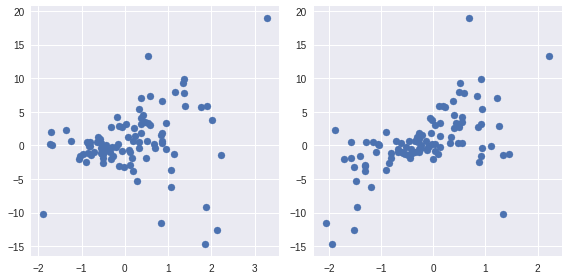

In [250]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

axes[0].scatter(data["x1"], data["y"])
axes[1].scatter(data["x2"], data["y"])

fig.tight_layout()

In [251]:
data.shape

(100, 4)

In [252]:
# apply ordinary least squares
result = smf.ols("y ~ x1 + x2", data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     29.76
Date:                Tue, 09 May 2017   Prob (F-statistic):           8.36e-11
Time:                        12:38:43   Log-Likelihood:                -271.52
No. Observations:                 100   AIC:                             549.0
Df Residuals:                      97   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9868      0.382      2.581      0.011       0.228       1.746
x1             1.0810      0.391      2.766      0.007       0.305       1.857
x2             3.0793      0.432      7.134      0.000       2.223       3.936
==============================================================================
Omnibus:                       19.951   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.964
Skew:                          -0.660   Prob(JB):                     1.41e-11
Kurtosis:                       6.201   Cond. No.                         1.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [253]:
# r-squared: how does data fit model? (1.0 = perfect)
result.rsquared

0.38025383255132539

In [254]:
# to investigate whether assumption of normal-distributed errors is justified
# start with residuals
result.resid.head()

0    -3.370455
1   -11.153477
2   -11.721319
3    -0.948410
4     0.306215
dtype: float64

In [255]:
z, p = stats.normaltest(result.fittedvalues.values)
p

0.65109804119705683

In [256]:
# extract coefficients
result.params

Intercept    0.986826
x1           1.081044
x2           3.079284
dtype: float64

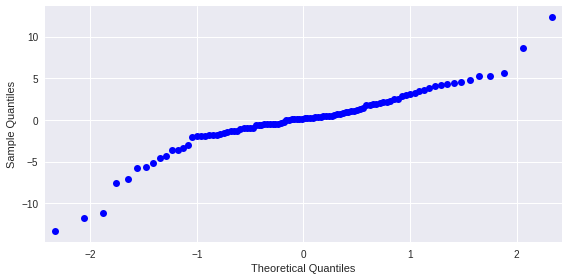

In [257]:
fig, ax = plt.subplots(figsize=(8, 4))
smg.qqplot(result.resid, ax=ax)

fig.tight_layout()
fig.savefig("ch14-qqplot-model-1.pdf")

In [258]:
x = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x, x)

In [259]:
new_data = pd.DataFrame(
    {"x1": X1.ravel(), 
     "x2": X2.ravel()})

In [260]:
# predict y values
y_pred = result.predict(new_data)
y_pred.shape

(2500,)

In [261]:
# resize to square matrix for plotting purposes
y_pred = y_pred.reshape(50, 50)

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


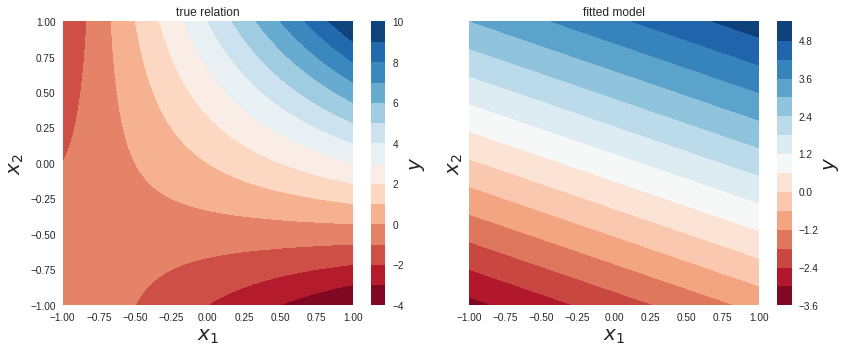

In [262]:
# do contour plots - true model vs fitted (100 noisy obs) model

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

def plot_y_contour(ax, Y, title):
    c = ax.contourf(X1, X2, Y, 15, cmap=plt.cm.RdBu)
    ax.set_xlabel(r"$x_1$", fontsize=20)
    ax.set_ylabel(r"$x_2$", fontsize=20)
    ax.set_title(title)
    cb = fig.colorbar(c, ax=ax)
    cb.set_label(r"$y$", fontsize=20)

plot_y_contour(axes[0], y_true(X1, X2), "true relation")
plot_y_contour(axes[1], y_pred, "fitted model")

fig.tight_layout()
fig.savefig("ch14-comparison-model-true.pdf")

### Datasets from R

In [263]:
dataset = sm.datasets.get_rdataset("Icecream", "Ecdat")
dataset.title

'Ice Cream Consumption'

In [264]:
dataset.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
cons      30 non-null float64
income    30 non-null int64
price     30 non-null float64
temp      30 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.0 KB


In [265]:
# ordinary least squares regression
model = smf.ols(
    "cons ~ -1 + price + temp", 
    data=dataset.data)
result = model.fit()

In [266]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cons   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     1001.
Date:                Tue, 09 May 2017   Prob (F-statistic):           9.03e-27
Time:                        12:38:47   Log-Likelihood:                 51.903
No. Observations:                  30   AIC:                            -99.81
Df Residuals:                      28   BIC:                            -97.00
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
price          0.7254      0.093      7.805      0.000       0.535       0.916
temp           0.0032      0.000      6.549      0.000       0.002       0.004
==============================================================================
Omnibus:                        5.350   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                3.675
Skew:                           0.776   Prob(JB):                        0.159
Kurtosis:                       3.729   Cond. No.                         593.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

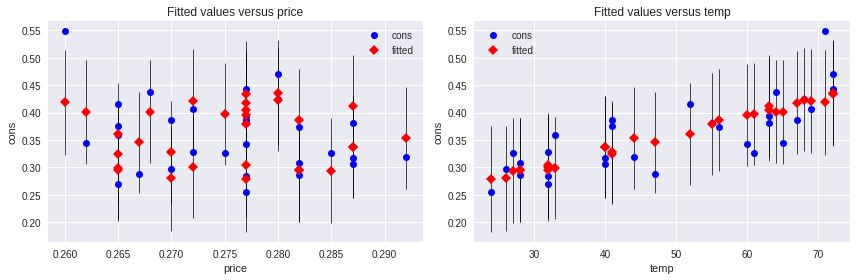

In [267]:
# maybe ice cream consumption = linear corr to temp, no relation to price?

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

smg.plot_fit(result, 0, ax=ax1)
smg.plot_fit(result, 1, ax=ax2)

fig.tight_layout()
fig.savefig("ch14-regressionplots.pdf")

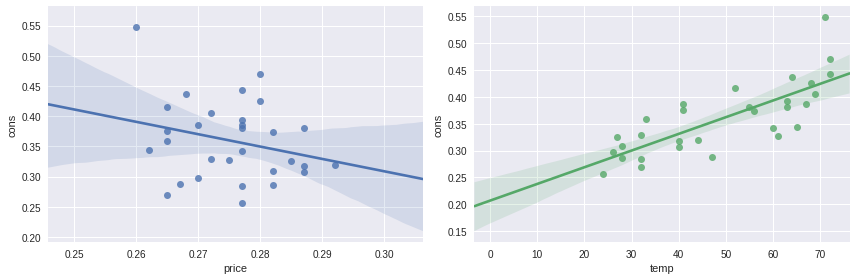

In [268]:
# sure looks that way

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

sns.regplot("price", "cons", dataset.data, ax=ax1);
sns.regplot("temp", "cons", dataset.data, ax=ax2);

fig.tight_layout()
fig.savefig("ch14-regressionplots-seaborn.pdf")

### Discrete regression, logistic regression
* log(p/(1-p)) = B0 + B*x, <==> p = (1+exp(-B0 - B1*x))^-1
* p < 0.5 == predicts y = 0
* p > 0.5 == predicts y = 1
* statmodel discrete regression support: **Logit** (logistic regression), **Probit** (uses CMF of normal distribution, transforms linear predictor to [0,1], **MNLogit** (multinomial logistic regression), and **Poisson** classes.

In [269]:
# Iris dataset
df = sm.datasets.get_rdataset("iris").data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [270]:
# 3 unique species
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [271]:
# let's use versicolor & virginica species as basis for binary variable
df_subset = df[(df.Species == "versicolor") | (df.Species == "virginica" )].copy()
df_subset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [272]:
df_subset.Species = df_subset.Species.map(
    {"versicolor": 1, 
     "virginica": 0})

In [273]:
# clean up names so Python doesn't have problems
df_subset.rename(
    columns={
        "Sepal.Length": "Sepal_Length", 
        "Sepal.Width": "Sepal_Width",
        "Petal.Length": "Petal_Length", 
        "Petal.Width": "Petal_Width"}, inplace=True)

In [274]:
df_subset.head(3) # 100 rows x 5  cols

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1


In [275]:
# use Patsy to create a logit model 
model = smf.logit(
    "Species ~ Sepal_Length + Sepal_Width + Petal_Length + Petal_Width", 
    data=df_subset)

In [276]:
# error: operands could not be broadcast together with shapes (100,2) (100,)
#result = model.fit()

In [277]:
#print(result.summary())

In [278]:
#print(result.get_margeff().summary())

**Note:** Sepal_Length and Sepal_Width do not seem to contribute much to predictiveness of the model. 

In [279]:
#model = smf.logit("Species ~ Petal_Length + Petal_Width", data=df_subset)

In [280]:
#result = model.fit()

In [281]:
#print(result.summary())

In [282]:
#print(result.get_margeff().summary())

In [283]:
#params = result.params
#beta0 = -params['Intercept']/params['Petal_Width']
#beta1 = -params['Petal_Length']/params['Petal_Width']

In [284]:
#df_new = pd.DataFrame({"Petal_Length": np.random.randn(20)*0.5 + 5,
#                       "Petal_Width": np.random.randn(20)*0.5 + 1.7})

In [285]:
#df_new["P-Species"] = result.predict(df_new)

In [286]:
#df_new["P-Species"].head(3)

In [287]:
#df_new["Species"] = (df_new["P-Species"] > 0.5).astype(int)

In [288]:
#df_new.head()

In [289]:
#fig, ax = plt.subplots(1, 1, figsize=(8, 4))

#ax.plot(df_subset[df_subset.Species == 0].Petal_Length.values,
#        df_subset[df_subset.Species == 0].Petal_Width.values, 's', label='virginica')
#ax.plot(df_new[df_new.Species == 0].Petal_Length.values,
#        df_new[df_new.Species == 0].Petal_Width.values,
#        'o', markersize=10, color="steelblue", label='virginica (pred.)')

#ax.plot(df_subset[df_subset.Species == 1].Petal_Length.values,
#        df_subset[df_subset.Species == 1].Petal_Width.values, 's', label='versicolor')
#ax.plot(df_new[df_new.Species == 1].Petal_Length.values,
#        df_new[df_new.Species == 1].Petal_Width.values,
#        'o', markersize=10, color="green", label='versicolor (pred.)')

#_x = np.array([4.0, 6.1])
#ax.plot(_x, beta0 + beta1 * _x, 'k')

#ax.set_xlabel('Petal length')
#ax.set_ylabel('Petal width')
#ax.legend(loc=2)
#fig.tight_layout()
#fig.savefig("ch14-logit.pdf")

### Poisson distribution
* use case: response variable = #successes for many attempts - each with low probability of success.

In [290]:
# discoveries dataset
dataset = sm.datasets.get_rdataset("discoveries")

In [291]:
df = dataset.data.set_index("time")
df.head(10).T

time,1860,1861,1862,1863,1864,1865,1866,1867,1868,1869
discoveries,5,3,0,2,0,3,2,3,6,1


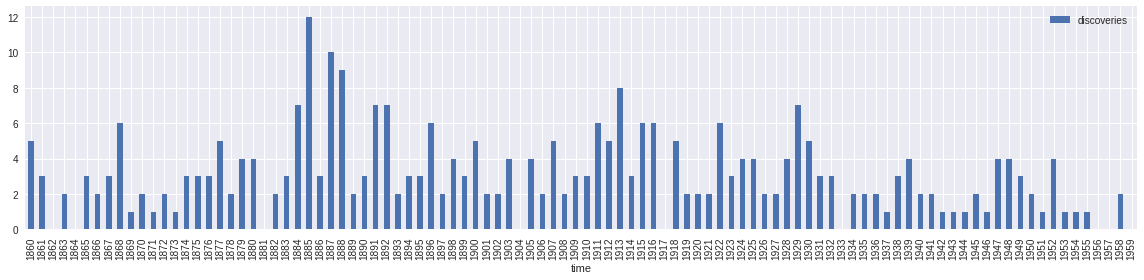

In [292]:
fig, ax = plt.subplots(1, 1, figsize=(16, 4))
df.plot(kind='bar', ax=ax)
fig.tight_layout()
fig.savefig("ch14-discoveries.pdf")

In [293]:
 # patsy formula with only intercept coeff (Poisson distribution param)
model = smf.poisson("discoveries ~ 1", data=df)
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 2.168457
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:            discoveries   No. Observations:                  100
Model:                        Poisson   Df Residuals:                       99
Method:                           MLE   Df Model:                            0
Date:                Tue, 09 May 2017   Pseudo R-squ.:                   0.000
Time:                        12:38:57   Log-Likelihood:                -216.85
converged:                       True   LL-Null:                       -216.85
                                        LLR p-value:                       nan
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1314      0.057     19.920      0.000       1.020       1.243
==============================================================================
"""

In [294]:
# lambda param of poisson distribution via exponential function
# use to compare histogram of observed counts vs theoretical results
lmbda = np.exp(result.params) 

In [295]:
X = stats.poisson(lmbda)

In [296]:
result.conf_int()

,0,1
Intercept,1.020084,1.242721


In [297]:
# create upper & lower confidence interval bounds
X_ci_l = stats.poisson(np.exp(result.conf_int().values)[0, 0])
X_ci_u = stats.poisson(np.exp(result.conf_int().values)[0, 1])

In [298]:
v, k = np.histogram(df.values, bins=12, range=(0, 12), normed=True)

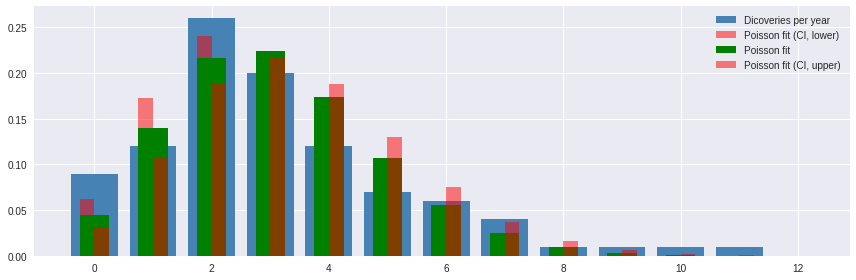

In [299]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.bar(k[:-1], v, color="steelblue",  align='center', label='Dicoveries per year') 
ax.bar(k-0.125, X_ci_l.pmf(k), color="red", alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, lower)')
ax.bar(k, X.pmf(k), color="green",  align='center', width=0.5, label='Poisson fit')
ax.bar(k+0.125, X_ci_u.pmf(k), color="red",  alpha=0.5, align='center', width=0.25, label='Poisson fit (CI, upper)')

ax.legend()
fig.tight_layout()
fig.savefig("ch14-discoveries-per-year.pdf")

# conclusion:
# dataset NOT well described by poisson process

### Time series
* Not same as regular regression - time series samples can't be regarding as independent random samples.
* example model type for time series = autoregressive (AR) model - future value depends on "p" earlier values. AR = special case of ARMA (autoregressive with moving average) model.

In [300]:
# outdoor temp dataset
df = pd.read_csv(
    "temperature_outdoor_2014.tsv", 
    header=None, 
    delimiter="\t", 
    names=["time", "temp"])

df.time = pd.to_datetime(df.time, unit="s")
#df.time
df      = df.set_index("time").resample("H")
df.head()

/home/bjpcjp/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: FutureWarning: 
.resample() is now a deferred operation
You called head(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


,temp
time,
2013-12-31 23:00:00,4.166667
2014-01-01 00:00:00,3.851667
2014-01-01 01:00:00,3.610000
2014-01-01 02:00:00,3.376667
2014-01-01 03:00:00,3.303333


In [301]:
#df_march = df[df.index.month == 3]
#df_april = df[df.index.month == 4]

In [302]:
#df_march.plot(figsize=(12, 4));

In [303]:
#fig, axes = plt.subplots(1, 4, figsize=(12, 3))
#smg.tsa.plot_acf(df_march.temp, lags=72, ax=axes[0])
#smg.tsa.plot_acf(df_march.temp.diff().dropna(), lags=72, ax=axes[1])
#smg.tsa.plot_acf(df_march.temp.diff().diff().dropna(), lags=72, ax=axes[2])
#smg.tsa.plot_acf(df_march.temp.diff().diff().diff().dropna(), lags=72, ax=axes[3])
#fig.tight_layout()
#fig.savefig("ch14-timeseries-autocorrelation.pdf")

In [304]:
#model = sm.tsa.AR(df_march.temp)

In [305]:
#result = model.fit(72)

In [306]:
#sm.stats.durbin_watson(result.resid)

In [307]:
#fig, ax = plt.subplots(1, 1, figsize=(8, 3))
#smg.tsa.plot_acf(result.resid, lags=72, ax=ax)
#fig.tight_layout()
#fig.savefig("ch14-timeseries-resid-acf.pdf")

In [308]:
#fig, ax = plt.subplots(1, 1, figsize=(12, 4))
#ax.plot(df_march.index.values[-72:], df_march.temp.values[-72:], label="train data")
#ax.plot(df_april.index.values[:72], df_april.temp.values[:72], label="actual outcome")
#ax.plot(pd.date_range("2014-04-01", "2014-04-4", freq="H").values,
#        result.predict("2014-04-01", "2014-04-4"), label="predicted outcome")

#ax.legend()
#fig.tight_layout()
#fig.savefig("ch14-timeseries-prediction.pdf")

In [309]:
# Using ARMA model on daily average temperatures

In [310]:
#df_march = df_march.resample("D")

In [311]:
#df_april = df_april.resample("D")

In [312]:
#model = sm.tsa.ARMA(df_march, (4, 1))

In [313]:
#result = model.fit()

In [314]:
#fig, ax = plt.subplots(1, 1, figsize=(12, 4))
#ax.plot(df_march.index.values[-3:], df_march.temp.values[-3:], 's-', label="train data")
#ax.plot(df_april.index.values[:3], df_april.temp.values[:3], 's-', label="actual outcome")
#ax.plot(pd.date_range("2014-04-01", "2014-04-3").values,
#        result.predict("2014-04-01", "2014-04-3"), 's-', label="predicted outcome")
#ax.legend()
#fig.tight_layout()